In [53]:
import pandas as pd

In [54]:
url_or_path = 'credit_scoring.txt'
dados = pd.read_csv(url_or_path)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [55]:
linhas = dados.shape[0]
colunas = dados.shape[1]
print('Contém %d linhas e %d colunas' % (linhas, colunas))

Contém 1000 linhas e 21 colunas


In [56]:
count_duplicados = dados.duplicated().sum()
count_nulos = dados.isnull().sum().sum()
print('Contém %d registro duplicados e %d registros nulos' % (count_duplicados, count_nulos))

Contém 0 registro duplicados e 0 registros nulos


In [57]:
print('Antes')
print('conta_corrente: %s' % dados['conta_corrente'].unique())
print('historico_credito: %s' % dados['historico_credito'].unique())
print('proposito_emprestimo: %s' % dados['proposito_emprestimo'].unique())
print('reserva_cc: %s' % dados['reserva_cc'].unique())
print('tempo_emprego_atual: %s' % dados['tempo_emprego_atual'].unique())
print('sexo_est_civil: %s' % dados['sexo_est_civil'].unique())
print('outros_fiadores: %s' % dados['outros_fiadores'].unique())
print('propriedade: %s' % dados['propriedade'].unique())
print('outros_planos_financiamento: %s' % dados['outros_planos_financiamento'].unique())
print('tipo_residencia: %s' % dados['tipo_residencia'].unique())
print('n_creditos_banco: %s' % dados['n_creditos_banco'].unique())
print('status_emprego: %s' % dados['status_emprego'].unique())
print('telefone: %s' % dados['telefone'].unique())
print('trabalhador_estrangeiro: %s' % dados['trabalhador_estrangeiro'].unique())

dados['conta_corrente'] = dados['conta_corrente'].map({
  '< 0 DM': 1,
  '0 <= ... < 200 DM': 2,
  'no checking account': 3,
  '>= 200 DM / salary assignments for at least 1 year': 4
})

dados['historico_credito'] = dados['historico_credito'].map({
  'critical account/ other credits existing (not at this bank)': 1,
  'existing credits paid back duly till now': 2,
  'delay in paying off in the past': 3,
  'no credits taken/ all credits paid back duly': 4,
  'all credits at this bank paid back duly': 5
})

dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map({
  'domestic appliances': 1,
  '(vacation - does not exist?)': 2,
  'radio/television': 3,
  'car (new)': 4,
  'car (used)': 5,
  'business': 6,
  'repairs': 7,
  'education': 8,
  'furniture/equipment': 9,
  'retraining': 10,
})

dados['reserva_cc'] = dados['reserva_cc'].map({
  'unknown/ no savings account': 1,
  '... < 100 DM': 2,
  '500 <= ... < 1000 DM ': 3,
  '.. >= 1000 DM ': 4,
  '100 <= ... < 500 DM': 5
})

dados['tempo_emprego_atual'] = dados['tempo_emprego_atual'].map({
  '.. >= 7 years': 1,
  '1 <= ... < 4 years': 2,
  '4 <= ... < 7 years': 3,
  'unemployed': 4,
  '... < 1 year ': 5
})

dados['sexo_est_civil'] = dados['sexo_est_civil'].map({
  'male : single': 1,
  'female : divorced/separated/married': 2,
  'male : divorced/separated': 3,
  'male : married/widowed': 4,
  'female : single': 5
})

dados['outros_fiadores'] = dados['outros_fiadores'].map({
    'none': 1,
    'guarantor': 2,
    'co-applicant': 3
})

dados['propriedade'] = dados['propriedade'].map({
  'real estate': 1,
  'if not A121 : building society savings agreement/ life insurance': 2,
  'unknown / no property': 3,
  'if not A121/A122 : car or other, not in attribute 6': 4
})

dados['outros_planos_financiamento'] = dados['outros_planos_financiamento'].map({
	'none': 1,
  'bank': 2,
  'stores': 3
})

dados['tipo_residencia'] = dados['tipo_residencia'].map({
  'own': 1,
  'for free': 2,
  'rent': 3
})

dados['status_emprego'] = dados['status_emprego'].map({
  'skilled employee / official' : 1,
  'unskilled - resident': 2,
  'management/ self-employed/ highly qualified employee/ officer': 3,
  'unemployed/ unskilled - non-resident': 4
})

dados['telefone'] = dados['telefone'].map({
  'yes, registered under the customers name ': 1, 
  'none': 2
})

dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map({
  'no': 1,
  'yes': 2
})

print('\nDepois')
print('conta_corrente: %s' % dados['conta_corrente'].unique())
print('historico_credito: %s' % dados['historico_credito'].unique())
print('proposito_emprestimo: %s' % dados['proposito_emprestimo'].unique())
print('reserva_cc: %s' % dados['reserva_cc'].unique())
print('tempo_emprego_atual: %s' % dados['tempo_emprego_atual'].unique())
print('sexo_est_civil: %s' % dados['sexo_est_civil'].unique())
print('outros_fiadores: %s' % dados['outros_fiadores'].unique())
print('propriedade: %s' % dados['propriedade'].unique())
print('outros_planos_financiamento: %s' % dados['outros_planos_financiamento'].unique())
print('tipo_residencia: %s' % dados['tipo_residencia'].unique())
print('n_creditos_banco: %s' % dados['n_creditos_banco'].unique())
print('status_emprego: %s' % dados['status_emprego'].unique())
print('telefone: %s' % dados['telefone'].unique())
print('trabalhador_estrangeiro: %s' % dados['trabalhador_estrangeiro'].unique())

Antes
conta_corrente: ['< 0 DM' '0 <= ... < 200 DM' 'no checking account'
 '>= 200 DM / salary assignments for at least 1 year']
historico_credito: ['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']
proposito_emprestimo: ['domestic appliances' '(vacation - does not exist?)' 'radio/television'
 'car (new)' 'car (used)' 'business' 'repairs' 'education'
 'furniture/equipment' 'retraining']
reserva_cc: ['unknown/ no savings account' '... < 100 DM' '500 <= ... < 1000 DM '
 '.. >= 1000 DM ' '100 <= ... < 500 DM']
tempo_emprego_atual: ['.. >= 7 years' '1 <= ... < 4 years' '4 <= ... < 7 years' 'unemployed'
 '... < 1 year ']
sexo_est_civil: ['male : single' 'female : divorced/separated/married'
 'male : divorced/separated' 'male : married/widowed']
outros_fiadores: ['none' 'guarantor' 'co-applicant']
propriedade: [

In [58]:
Y = dados['default']
X = dados.drop(columns='default')

In [59]:
Y.head(1)

0    0
Name: default, dtype: int64

In [60]:
X.head(1)

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,2


In [61]:
from sklearn.model_selection import train_test_split

SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(X, Y, test_size=0.3, random_state=SEED)

count_treino = treino_x.shape[0]
count_teste = teste_x.shape[0]
print('Contém %d registros de treino e %d registros de teste' % (count_treino, count_teste))

Contém 700 registros de treino e 300 registros de teste


In [62]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y)
print(modelo.score(treino_x, treino_y))

0.7342857142857143


In [63]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [64]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(teste_y, previsoes)
accuracy = round(accuracy, 3) * 100
accuracy

77.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


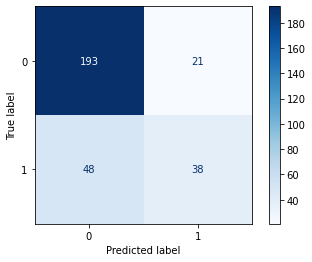

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, cmap='Blues', values_format='.3g')
matriz_confusao

In [66]:
from sklearn.metrics import classification_report

print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       214
           1       0.64      0.44      0.52        86

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.69       300
weighted avg       0.76      0.77      0.76       300



roc_auc 0.7504346881112801


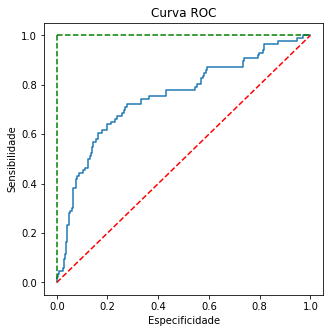

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = modelo.predict_proba(teste_x)[:, 1]
taxa_falso_positivo, taxa_verdadeiro_positivo, limte = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize=(5, 5))
plt.title('Curva ROC')
plt.plot(taxa_falso_positivo, taxa_verdadeiro_positivo)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
# linha da regressão aleatória
plt.plot([0, 1], ls='--', c='red') # linha vermelha diagonal
# linhas da regressão perfeita
plt.plot([0, 0], [1, 0], ls='--', c='green') # linha verde vertical
plt.plot([1, 1], ls='--', c='green') # linha verde horizontal 
plt.show()

#area entre 0.7 e 0.8 -> discriminação aceitavel

In [68]:
variaveis_analise = ['idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
dados[variaveis_analise].describe()

,idade,prazo_emprestimo_meses,valor_emprestimo
count,1000.000000,1000.000000,1000.000000
mean,35.546000,20.903000,3271.258000
std,11.375469,12.058814,2822.736876
min,19.000000,4.000000,250.000000
25%,27.000000,12.000000,1365.500000
50%,33.000000,18.000000,2319.500000
75%,42.000000,24.000000,3972.250000
max,75.000000,72.000000,18424.000000


In [69]:
# Homem = categorias 1, 3, 4
# Mulher = categorias 2, 5
value_counts = dados['sexo_est_civil'].value_counts()
print('Temos %d homens e %d mulheres' % (value_counts[1] + value_counts[3] + value_counts[4], value_counts[2]))

Temos 690 homens e 310 mulheres


In [70]:
dados['default'].value_counts()
# Nossa base de dados é desbalanceada

0    700
1    300
Name: default, dtype: int64

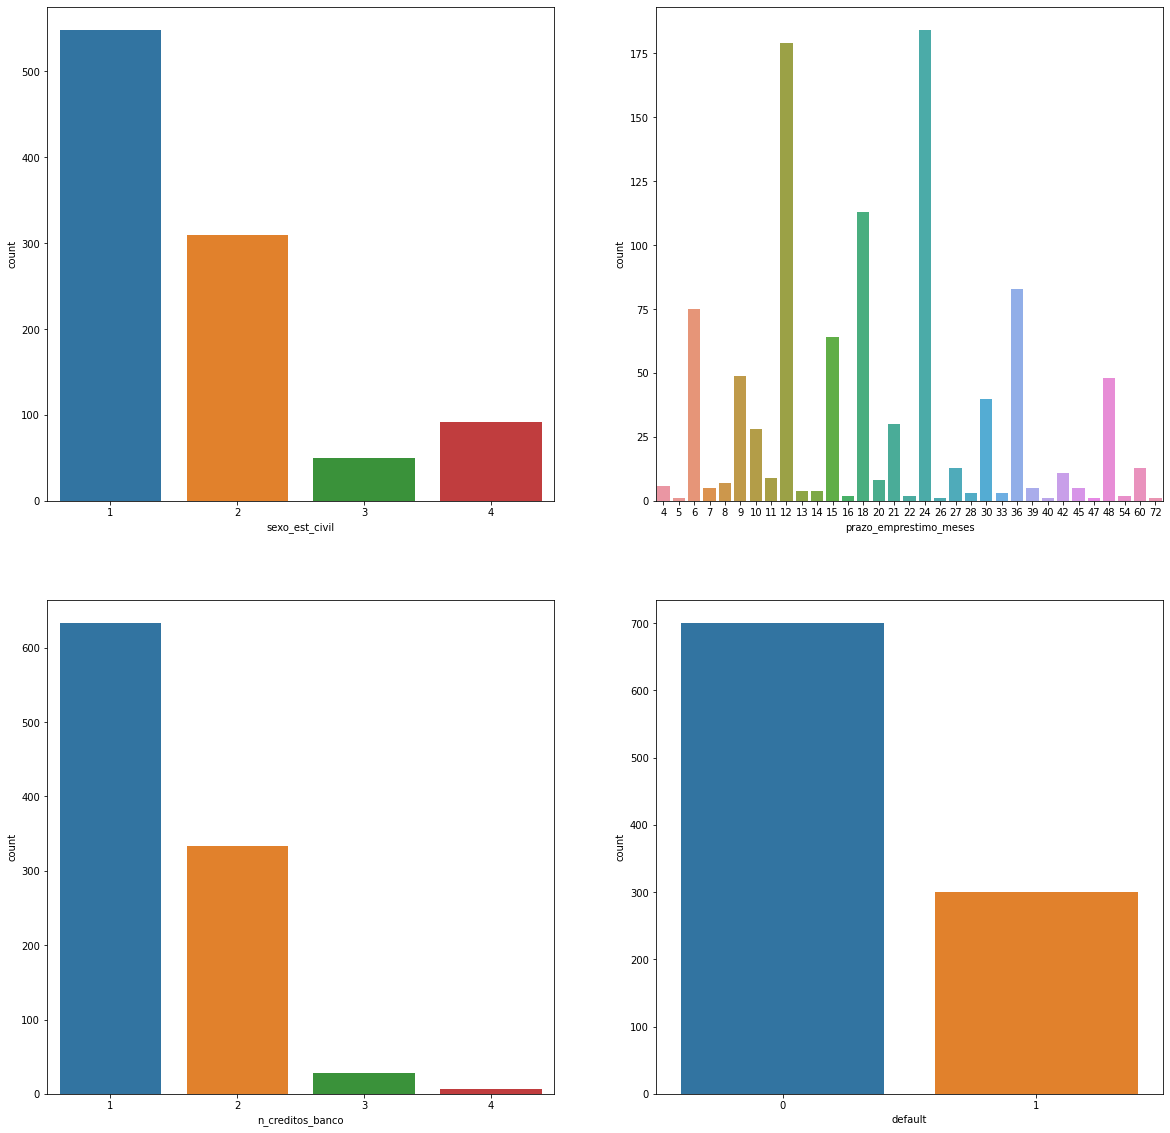

In [71]:
import seaborn as sns

histogramas = enumerate(['sexo_est_civil', 'prazo_emprestimo_meses', 'n_creditos_banco', 'default'])

plt.figure(figsize=(20,20))

for idx, coluna in histogramas:
  plt.subplot(2, 2, idx + 1)
  sns.countplot(x = coluna, data = dados)

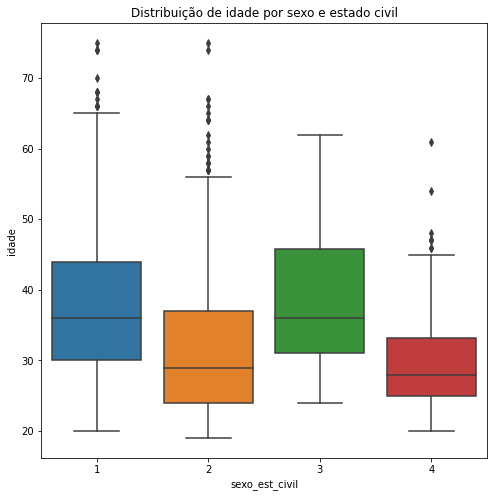

In [72]:
plt.figure(figsize=(8,8))
plt.title('Distribuição de idade por sexo e estado civil')
sns.boxplot(x='sexo_est_civil', y='idade', data=dados)
plt.show()

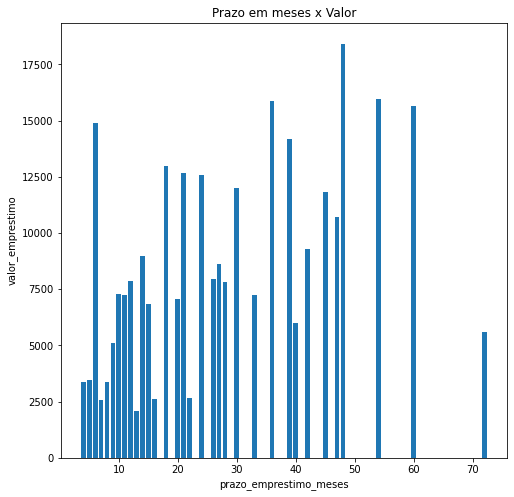

In [73]:
plt.figure(figsize=(8, 8))
plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)
plt.xlabel('prazo_emprestimo_meses')
plt.ylabel('valor_emprestimo')
plt.title('Prazo em meses x Valor')
plt.show()

In [74]:
"""
Mapeamento novo da variavel "sexo_est_civil", facilitando
a visualização do agrupamento

Variavel sexo_est_civil sem conversão

male : single = 1
female : divorced/separated/married = 2
male : divorced/separated = 3
male : married/widowed = 4
female : single = 5

Variavel sexo
0 = homen
1 = mulher

Variavel estado civil
0 = casado(a)/divorcidado(a)/viuvo(a)
1 = solteiro(a)
"""

dados['sexo'] = dados['sexo_est_civil'].map({
  1: 0,
  3: 0,
  4: 0,
  2: 1,
  5: 1
})

dados['est_civil'] = dados['sexo_est_civil'].map({
  1: 1,
  5: 1,
  2: 0,
  3: 0,
  4: 0
})

dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,est_civil
0,0,1,6,1,1,1169,1,1,4,1,...,67,1,1,2,1,1,1,2,0,1
1,1,2,48,2,1,5951,2,2,2,2,...,22,1,1,1,1,1,2,2,1,0
2,0,3,12,1,2,2096,2,3,2,1,...,49,1,1,1,2,2,2,2,0,1
3,0,1,42,2,3,7882,2,3,2,1,...,45,1,2,1,1,2,2,2,0,1
4,1,1,24,3,4,4870,2,2,3,1,...,53,1,2,2,1,2,2,2,0,1


In [92]:
dados = dados.drop(columns=['sexo_est_civil', 'sexo'])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,1,1,2,1,1,1,2,1,5,1
1,1,2,48,2,1,5951,2,2,2,1,...,1,1,1,1,1,2,2,0,1,4
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,1,2,2,2,2,1,3,1
3,0,1,42,2,3,7882,2,3,2,2,...,1,2,1,1,2,2,2,1,3,4
4,1,1,24,3,4,4870,2,2,3,1,...,1,2,2,1,2,2,2,1,4,2


In [93]:
def treina_modelo(dados, modelo):

  Y = dados['default']
  X = dados.drop(columns='default')

  treino_x, teste_x, treino_y, teste_y = train_test_split(X, Y, test_size=0.3)

  count_treino = treino_x.shape[0]
  count_teste = teste_x.shape[0]

  print('%d elementos de treino e %d elementos de teste' % (count_treino, count_teste))
  print('-' * 50)

  modelo.fit(treino_x, treino_y)

  matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, values_format='.3g', cmap='Blues')
  plt.title('Matriz de confusão')
  plt.show(block=True)
  print('-' * 50)

  print('\nClassification Report: ')
  previsoes = modelo.predict(teste_x)
  print(classification_report(teste_y, previsoes))
  print('-' * 50)

  probabilidade_previsao = modelo.predict_proba(teste_x)[:,1]
  taxa_falso_positivo, taxa_verdadeiro_positivo, limite = roc_curve(teste_y, probabilidade_previsao)
  print('roc_auc: %d' % (roc_auc_score(teste_y, probabilidade_previsao)))

  plt.subplots(1, figsize=(5, 5))
  plt.title('Curva ROC')
  plt.plot(taxa_falso_positivo, taxa_verdadeiro_positivo)
  plt.xlabel('Especificidade')
  plt.ylabel('Sensibilidade')
  # linha da regressão aleatória
  plt.plot([0, 1], ls='--', c='red') # linha vermelha diagonal
  # linhas da regressão perfeita
  plt.plot([0, 0], [1, 0], ls='--', c='green') # linha verde vertical
  plt.plot([1, 1], ls='--', c='green') # linha verde horizontal 
  plt.show(block=True)

  return modelo

700 elementos de treino e 300 elementos de teste
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


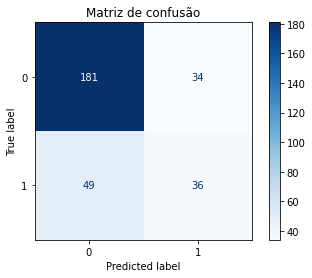

--------------------------------------------------

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       215
           1       0.51      0.42      0.46        85

    accuracy                           0.72       300
   macro avg       0.65      0.63      0.64       300
weighted avg       0.71      0.72      0.71       300

--------------------------------------------------
roc_auc: 0


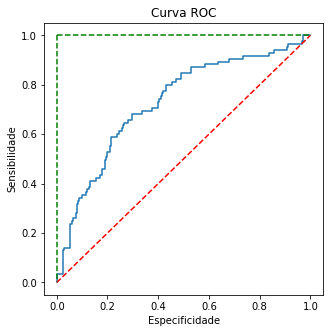

LogisticRegression(max_iter=1000)

In [94]:
treina_modelo(dados, LogisticRegression(max_iter=1000))

In [95]:
"""
Variavel faixa_idade

18 - 30 = 1
31 - 40 = 2
41 - 50 = 3
51 - 60 = 4
61 - 70 = 5
71 - 80 = 6
"""

dados['faixa_idade'] = pd.cut(x=dados['idade'], bins=[18, 30, 40, 50, 60, 70, 80], labels=[1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,1,1,2,1,1,1,2,1,5,1
1,1,2,48,2,1,5951,2,2,2,1,...,1,1,1,1,1,2,2,0,1,4
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,1,2,2,2,2,1,3,1
3,0,1,42,2,3,7882,2,3,2,2,...,1,2,1,1,2,2,2,1,3,4
4,1,1,24,3,4,4870,2,2,3,1,...,1,2,2,1,2,2,2,1,4,2


In [96]:
"""
Variavel faixa_prazo_emprestimo

01 - 12 = 1
13 - 24 = 2
25 - 36 = 3
37 - 48 = 4
49 - 60 = 5
61 - 72 = 6
"""

dados['faixa_prazo_emprestimo'] = pd.cut(x=dados['prazo_emprestimo_meses'], bins=[1, 12, 24, 36, 48, 60, 72], labels=[1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,1,1,2,1,1,1,2,1,5,1
1,1,2,48,2,1,5951,2,2,2,1,...,1,1,1,1,1,2,2,0,1,4
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,1,2,2,2,2,1,3,1
3,0,1,42,2,3,7882,2,3,2,2,...,1,2,1,1,2,2,2,1,3,4
4,1,1,24,3,4,4870,2,2,3,1,...,1,2,2,1,2,2,2,1,4,2


In [97]:
"""
Variavel faixa_valor_emprestimo

1 - 1000 = 1
1001 - 2000 = 2
2001 - 3000 = 3
3001 - 4000 = 4
4001 - 5000 = 5
5001 - 6000 = 6
6001 - 7000 = 7
7001 - 8000 = 8
8001 - 9000 = 9
9001 - 10000 = 10
10001 - 11000 = 11
11001 - 12000 = 12
12001 - 13000 = 13
13001 - 14000 = 14
14001 - 15000 = 15
15001 - 16000 = 16
16001 - 17000 = 17
17001 - 18000 = 18
18001 - 19000 = 19
19001 - 20000 = 20
"""

dados['faixa_valor_emprestimo'] = pd.cut(
    x=dados['valor_emprestimo'], 
    bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000], 
    labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,1,2,1,1,1,2,1,5,1,2
1,1,2,48,2,1,5951,2,2,2,1,...,1,1,1,1,2,2,0,1,4,6
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,2,2,2,2,1,3,1,3
3,0,1,42,2,3,7882,2,3,2,2,...,2,1,1,2,2,2,1,3,4,8
4,1,1,24,3,4,4870,2,2,3,1,...,2,2,1,2,2,2,1,4,2,5


In [98]:
dados = dados.drop(columns=['idade', 'prazo_emprestimo_meses', 'valor_emprestimo'])
dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,1,1,1,1,4,1,4,1,...,1,2,1,1,1,2,1,5,1,2
1,1,2,2,1,2,2,2,1,2,1,...,1,1,1,1,2,2,0,1,4,6
2,0,3,1,2,2,3,2,1,3,1,...,1,1,2,2,2,2,1,3,1,3
3,0,1,2,3,2,3,2,2,4,2,...,2,1,1,2,2,2,1,3,4,8
4,1,1,3,4,2,2,3,1,4,3,...,2,2,1,2,2,2,1,4,2,5


700 elementos de treino e 300 elementos de teste
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


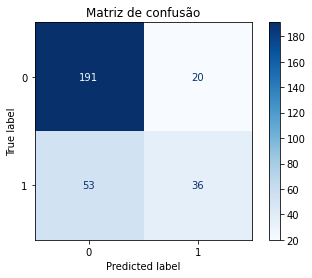

--------------------------------------------------

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       211
           1       0.64      0.40      0.50        89

    accuracy                           0.76       300
   macro avg       0.71      0.65      0.67       300
weighted avg       0.74      0.76      0.74       300

--------------------------------------------------
roc_auc: 0


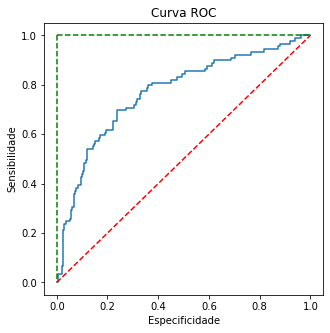

LogisticRegression(max_iter=1000)

In [99]:
treina_modelo(dados.copy(), LogisticRegression(max_iter=1000))